In [1]:
from minicons import cwe, scorer, utils

import torch
import csv

In [2]:
import matplotlib.pyplot as plt

In [3]:
model = cwe.CWE('bert-base-uncased')

In [8]:
sentences = [("the game is afoot now!", "afoot"), ("i was at the bank of the river ganga!", "bank")]
sentences = [("the game is afoot now!", 3), ("i was at the bank of the river ganga!", 4)]

In [9]:
model.extract_representation(sentences, 12)

tensor([[ 0.5399, -0.2461, -0.0968,  ..., -0.4670, -0.5312, -0.0549],
        [-0.8258, -0.4308,  0.2744,  ..., -0.5987, -0.6984,  0.2087]],
       grad_fn=<MeanBackward1>)

In [3]:
mlm_model = scorer.MaskedLMScorer('bert-base-uncased', 'cpu')
clm_model = scorer.IncrementalLMScorer('distilgpt2', 'cpu')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForMaskedLM were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['cls.predictions.decoder.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using pad_token, but it is not set yet.


In [7]:
stimuli = ["The keys to the cabinet are on the table.",
           "The keys to the cabinet is on the table."]

clm_model.score(stimuli)    

[41.51601982116699, 44.497480392456055]

In [19]:
log_probs = mlm_model.logprobs(mlm_model.prepare_text(["The keys to the cabinet are on the table.", "The keys to the cabinet is on the table."]))

In [20]:
lps, tokens = list(zip(*log_probs))

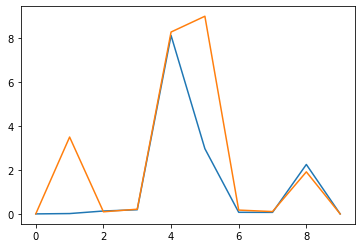

In [21]:
for x, y in enumerate(lps):
    plt.plot(-y)

In [4]:
clm_model.score(["Football is a sport.", "A football is a sport.", "Football is a bird.", "A football is a bird."])

[25.771879196166992, 33.48912048339844, 32.07358360290527, 37.89309310913086]

In [2]:
base_sentence = "He caught the pass and scored another touchdown. There was nothing he enjoyed more than a good game of"
words = ["football", "baseball", "monopoly"]

In [5]:
models = ["bert-base-uncased", "bert-large-uncased", "roberta-base", "gpt2", "openai-gpt", "xlnet-base-cased", "roberta-large"]

with open("/home/kmisra/contextual_n400.csv", 'w') as f:
    writer = csv.writer(f)
    for model in models:
        transformer = cwe.CWE(model, all_layers = True)
        for l in range(0, transformer.layers + 1):
            for word in words:
                sentence = base_sentence + " " + word
                w, c = transformer.context_cosine(sentence, word, layer = l)
                contextual_similarity = round(torch.tensor(list(dict(zip(w,c)).values())).mean().item(), 4)
                writer.writerow([model, l, word, contextual_similarity])

ftfy or spacy is not installed using BERT BasicTokenizer instead of SpaCy & ftfy.


In [5]:
dict(zip(w,c))

{'[CLS]': 0.9372750520706177,
 'he': 0.9298704862594604,
 'caught': 0.9448925852775574,
 'the': 0.9309799671173096,
 'pass': 0.9259966611862183,
 'and': 0.9368696808815002,
 'scored': 0.906683623790741,
 'another': 0.9423209428787231,
 'touchdown': 0.9199809432029724,
 '.': 0.9390969276428223,
 'there': 0.9411791563034058,
 'was': 0.9454566240310669,
 'nothing': 0.9330489635467529,
 'enjoyed': 0.9498648047447205,
 'more': 0.9263346791267395,
 'than': 0.9219998717308044,
 'a': 0.9281640648841858,
 'good': 0.9335828423500061,
 'game': 0.9325376749038696,
 'of': 0.9373526573181152,
 '[SEP]': 0.932860255241394}